In [41]:
%cd drive/My Drive/source code/Autonomous_Car_Simulator

[Errno 2] No such file or directory: 'drive/My Drive/source code/Autonomous_Car_Simulator'
/content/drive/My Drive/source code/Autonomous_Car_Simulator


In [42]:
import pandas as pd
import csv
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import torchvision
import matplotlib.pyplot as plt
import torch.utils.data as data
import ntpath

from torchvision import transforms as tf
from sklearn.model_selection import train_test_split
from PIL import Image
from pathlib import Path

In [43]:
root = 'Data'
csv_file = os.path.join(root, 'driving_log.csv')
images = os.path.join(root, 'IMG')

In [44]:
table = pd.read_csv(csv_file, names = ['center', 'left', 'right', 'steering', 'throttle', 'reserve','speed'])
table.head()

,center,left,right,steering,throttle,reserve,speed
0,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,0.0,0.0,0,0.000006
1,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,0.0,0.0,0,0.000015
2,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,0.0,0.0,0,0.000009
3,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,0.0,0.0,0,0.000012
4,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,D:\Deep Learning\beta_simulator_windows\beta_s...,0.0,0.0,0,0.000005


In [45]:
train_set, val_set = train_test_split(table, train_size = 0.8)

In [46]:
class UdacityCar(data.Dataset):
    def __init__(self, root, table, transforms = None):
        super().__init__()
        self.root = root
        self.table = table
        self.transforms = transforms
        self.load_data()

    def load_data(self):
        self.data = []
        for idx, row in self.table.iterrows():
            center = os.path.join(self.root, ntpath.basename(row[0]))
            left = os.path.join(self.root, ntpath.basename(row[1]))
            right = os.path.join(self.root, ntpath.basename(row[2]))

            steering = row[3]
            throttle = row[4]
            self.data.append((center, steering, throttle))
            self.data.append((left, steering + 0.2, throttle))
            self.data.append((right, steering - 0.2, throttle))
    def __getitem__(self, idx):
        img, steering, throttle = self.data[idx]
        img = Image.open(img)

        if self.transforms is not None:
            img, steering = self.transforms(img, steering)
        
        steering = torch.FloatTensor([steering])
        throttle = torch.FloatTensor([throttle])

        return img, steering, throttle
    
    def __len__(self):
        return len(self.data)

tensor([0.2000])


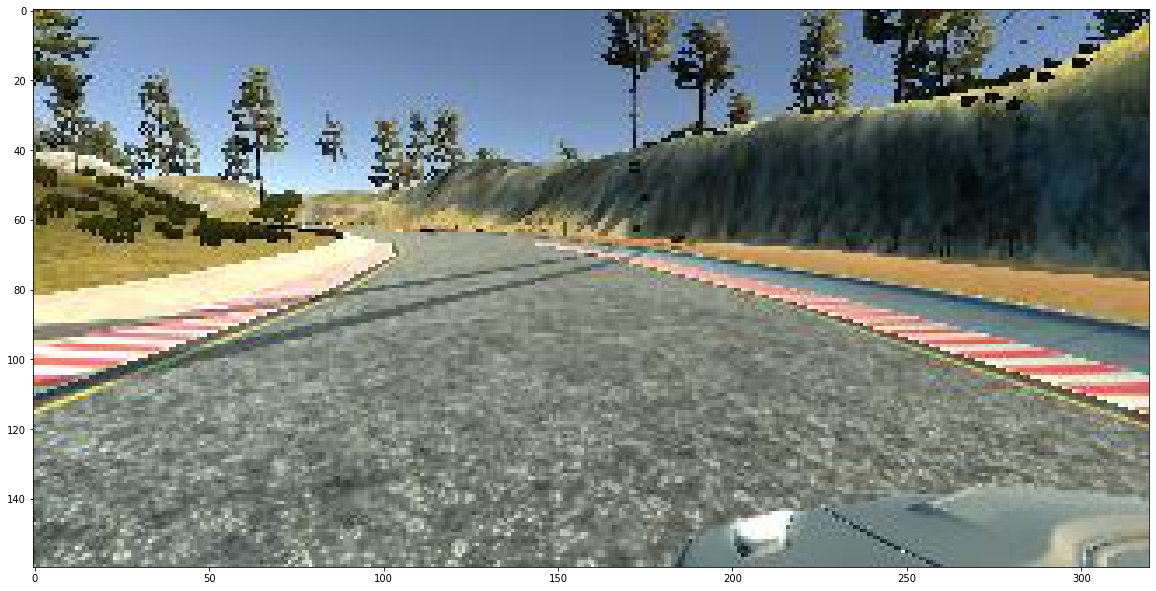

In [47]:
dataset = UdacityCar(images, table)
item = dataset[100]
print(item[1])
plt.figure(figsize=(20,20))
plt.imshow(item[0])
plt.show()

In [48]:
# Flip left right an image
class RandomHorizontalFlip(object):
    def __init__(self, ratio = 0.5):
        self.ratio = ratio
    
    def __call__(self, img, steering):
        if np.random.randint(1, 10)/ 10 <= self.ratio:
            img = np.flip(img, axis = 1)
            steering = -steering
        
        return img, steering
    


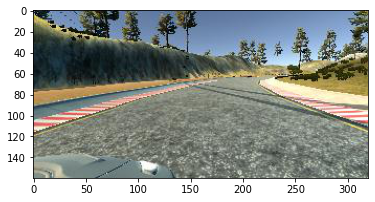

In [50]:
flip = RandomHorizontalFlip()
new_img, steering = flip(item[0], item[1])
plt.imshow(new_img)